<a href="https://colab.research.google.com/github/Sangram-Rout/me314/blob/main/ME314_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework #4
Name: (Sangram Keshari Rout)

Date: 10/20/19

**ALL PROBLEMS IN THIS HOMEWORK MUST BE DONE IN COLLABORATORY**. Yes, this includes your text answers to the questions in problem 4 and the derivation of the equations of motion in Problem 1---all of it!

## Imports and Helper Functions
Here you will find all the necessary libraries that we need to import to be able to complete the homework.

In [ ]:
import numpy as np
import sympy as sym
from sympy.abc import t
%matplotlib inline
import matplotlib.pyplot as plt

#######################
# Custom latex printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

####################
# Simulation helpers
def integrate(f,x0,dt):
    """
    This function takes in an initial condition x0 and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a vector x at the future time step.
    """
    k1=dt*f(x0)
    k2=dt*f(x0+k1/2.)
    k3=dt*f(x0+k2/2.)
    k4=dt*f(x0+k3)
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

def simulate(f,x0,tspan,dt,euler_int=False):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. Additionally, this includes a flag (default false)
    that allows one to supply an Euler intergation scheme instead of 
    the given scheme. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        if euler_int:
            xtraj[:,i]=euler(f,x,dt)
        else:
            xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj   

## Animation Helper
For this homework you will need to animate the triple pendulum. The function I have written below will animate a double pendulum so you *MUST* make changes in order to have it animate correctly. The inputs are the following:
1. An array of $\theta$ values over time that should have dimensions (3,N)
2. Lengths of each arm of the pendulum that you used in your simulation (should be 1 for all).
3. Time in seconds over which simulation takes place (should be 10).

The function call you'd use once you have your $\theta$ values is:

    animate_triple_pend(theta_array,1,1,1,10)

In [ ]:
def animate_triple_pend(theta_array,L1=1,L2=1,L3=1,T=10):
    """
    YOU MUST CHANGE THIS FUNCTION TO PLOT TRIPLE PENDULUM.
    Currently the innards of this function would plot a double pendulum.
    """
    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    
    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
      import IPython
      display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)
    
    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation
    
    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1, 
               mode='lines', name='Pendulum', 
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1, 
               mode='lines', name='Mass 1 Traj.',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2, 
               mode='lines', name='Mass 2 Traj.',
               line=dict(width=2, color='green')
              ),
        ]
    
    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )
    
    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k]], 
                            y=[0,yy1[k],yy2[k]], 
                            mode='lines',
                            line=dict(color='red', width=7)
                            )
                      ]) for k in range(N)]
    
    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

## Problem Set

In [ ]:
#@title
# Code to display images
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/tberrueta/ME314pngs/raw/master/dynhoop2.png' width='350' height='350'></td><td><img src='https://github.com/tberrueta/ME314pngs/raw/master/dyntripleconstrainedpend.PNG' width='350' height='350'></td></tr></table>"))

,


Figure 1: (left) The bead on a hoop system. (right) the constrained triple pendulum.

### Problem #1 (20 pts)
Take the bead on a hoop example in Fig. 1(left)
  and model it using a torque input $\tau$ (about the vertical $z$ axis)
  instead of a velocity input $\omega$.  You will need to add a
  configuration variable $\psi$ that is the rotation about the $z$ axis
  so that $q=(\theta,\psi)$. Give the equations of motion in terms of the
  two configuration variables.

In [ ]:
# Here we define the constants/variables relevant to the problem

#I have used k1 as Tau/force vector
m,R,g,k1= sym.symbols('m R g k1')
th = sym.Function(r'\theta')(t)
zeta = sym.Function(r'\zeta')(t)

# Here we define our configuration variables
q = sym.Matrix([th,zeta])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Lagrangian
KE = 0.5*m*(R*qdot[0])**2 + 0.5*m*(R*sym.sin(th)*qdot[1])**2
V = m*g*R*(1-sym.cos(th))
L = KE-V

# Define EL Equations
dLdq = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt = sym.Matrix([L]).jacobian(qdot).T.diff(t)
EulerLagrangeEQs = sym.Eq(ddLdqdot_dt-dLdq, sym.Matrix([0,k1]))

# Getting Solutions
EulerSols = sym.solve(EulerLagrangeEQs,[qddot[0],qddot[1]])

display(L)
display(sym.Eq(qddot[0],EulerSols[qddot[0]]))


                                       2                           2          
     2      2            ⎛d           ⎞         2   ⎛d            ⎞           
0.5⋅R ⋅m⋅sin (\theta(t))⋅⎜──(\zeta(t))⎟  + 0.5⋅R ⋅m⋅⎜──(\theta(t))⎟  - R⋅g⋅m⋅(
                         ⎝dt          ⎠             ⎝dt           ⎠           

                    
                    
-cos(\theta(t)) + 1)
                    

                 ⎛                               2    ⎞               
                 ⎜                 ⎛d           ⎞     ⎟               
  2              ⎜R⋅cos(\theta(t))⋅⎜──(\zeta(t))⎟  - g⎟⋅sin(\theta(t))
 d               ⎝                 ⎝dt          ⎠     ⎠               
───(\theta(t)) = ─────────────────────────────────────────────────────
  2                                        R                          
dt                                                                    

In [ ]:
display(sym.Eq(qddot[1],EulerSols[qddot[1]]))

                   2                      d             d                
  2             - R ⋅m⋅sin(2.0⋅\theta(t))⋅──(\theta(t))⋅──(\zeta(t)) + k₁
 d                                        dt            dt               
───(\zeta(t)) = ─────────────────────────────────────────────────────────
  2                                 2      2                             
dt                                 R ⋅m⋅sin (\theta(t))                  

### Problem #2 (20 pts)
Simulate and animate the *constrained* triple
  pendulum system in the figure (that is, constraining the end mass of
  the triple pendulum to the circle) where gravity is in the negative
  $y$ direction.  Use initial conditions
  $\theta_1(0)=-\frac{\pi}{2}$, $\dot{\theta}_1(0)=0$, $\theta_2(0)=-\frac{\pi}{2}$,
  $\dot{\theta}_2(0)=0$, $\theta_3(0)=\frac{\pi}{2}$,
  $\dot{\theta}_3(0)=0$ and parameters $R_1=R_2=R_3=m_1=m_2=m_3=1$ and the radius
  of the circle is $R_{circ}=\sqrt{5}$. Simulate from $t=0$ to $t=10$ with $dt=0.01$
  and animate the solution using your own triple pendulum animation function based on the starting code provided.
  
WARNING: symbollically solving for the triple pendulum equations of motion took my computer 13 minutes. I strongly recommend that you make separate cells for solving symbollically and numerically integrating your equations of motion. Also, we do not want you to print the equations of motion (and they may in fact break your notebook if you do print them). You will turn in your trajectory plots and animation, that's it.

In [ ]:
# Here we define the constants/variables relevant to the problem
m,R,g,lbd= sym.symbols('m R g \lambda')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
th3 = sym.Function(r'\theta_3')(t)
phi = sym.Function(r'\phi')(q)

# Here we define our configuration variables
q = sym.Matrix([th1,th2,th3])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Coordinate change to make Lagrangian calculation easier
x1 = +R*sym.sin(th1)
y1 = -R*sym.cos(th1)
x2 = x1 + R*sym.sin(th1+th2)
y2 = y1 - R*sym.cos(th1+th2)
x3 = x2 + R*sym.sin(th1+th2+th3)
y3 = y2 - R*sym.cos(th1+th2+th3)
x1d = x1.diff(t)
y1d = y1.diff(t)
x2d = x2.diff(t)
y2d = y2.diff(t)
x3d = x3.diff(t)
y3d = y3.diff(t)

# Lagrangian
KE = 0.5*m*(x1d**2+y1d**2) + 0.5*m*(x2d**2+y2d**2) + 0.5*m*(x3d**2+y3d**2)
PE = m*g*y1 + m*g*y2 + m*g*y3
L = KE - PE

phi=x3*x3+y3*y3-5
dphidq = sym.Matrix([phi]).jacobian(q).T

# Euler Lagrange Equations
dLdq = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt = sym.Matrix([L]).jacobian(qdot).T.diff(t)
EulerLagrangeEQs = sym.Eq(ddLdqdot_dt-dLdq, lbd*dphidq)


dphidt = phi.diff(t)
dphiddt = dphidt.diff(t)
Equation3 = sym.Eq(dphiddt,0)

# Getting Solutions # 
EulerSols = sym.solve([EulerLagrangeEQs,Equation3],[qddot[0],qddot[1],qddot[2],lbd])   


In [ ]:


def animate_triple_pend(theta_array,L1=1,L2=1,L3=1,T=10):
    """
    YOU MUST CHANGE THIS FUNCTION TO PLOT TRIPLE PENDULUM.
    Currently the innards of this function would plot a double pendulum.
    """
    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    
    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
      import IPython
      display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)
    
    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    xx3=xx2+L3*np.sin(theta_array[0]+theta_array[1]+theta_array[2])
    yy3=yy2-L3*np.cos(theta_array[0]+theta_array[1]+theta_array[2])
    N = len(theta_array[0]) 
    
    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1, 
               mode='lines', name='Pendulum', 
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1, 
               mode='lines', name='Mass 1 Traj.',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2, 
               mode='lines', name='Mass 2 Traj.',
               line=dict(width=2, color='green')
              ),
          dict(x=xx3, y=yy3, 
               mode='lines', name='Mass 3 Traj.',
               line=dict(width=2, color='yellow')
              ),
        ]
    
    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Triple Pendulum Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )
    
    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k],xx3[k]], 
                            y=[0,yy1[k],yy2[k],yy3[k]], 
                            mode='lines',
                            line=dict(color='red', width=7)
                            )
                      ]) for k in range(N)]
    
    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

# Dummy variables (avoid errors with d/dt terms)
theta1dot,theta2dot,theta3dot = sym.symbols('\dot{th_1} \dot{th_2} \dot{th_3}')
qdot_dummy = sym.Matrix([theta1dot,theta2dot,theta3dot])

# Substitute dummy variable into expressions
th1ddot_dummy = EulerSols[qddot[0]].subs({qdot[0]:qdot_dummy[0], qdot[1]:qdot_dummy[1], qdot[2]:qdot_dummy[2], R:1, g:9.81})
th2ddot_dummy = EulerSols[qddot[1]].subs({qdot[0]:qdot_dummy[0], qdot[1]:qdot_dummy[1], qdot[2]:qdot_dummy[2], R:1, g:9.81})
th3ddot_dummy = EulerSols[qddot[2]].subs({qdot[0]:qdot_dummy[0], qdot[1]:qdot_dummy[1], qdot[2]:qdot_dummy[2], R:1, g:9.81})

# Lambdify
lam_dyn_1 = sym.lambdify([th1,theta1dot,th2,theta2dot,th3,theta3dot],th1ddot_dummy)
lam_dyn_2 = sym.lambdify([th1,theta1dot,th2,theta2dot,th3,theta3dot],th2ddot_dummy)
lam_dyn_3 = sym.lambdify([th1,theta1dot,th2,theta2dot,th3,theta3dot],th3ddot_dummy)

#####################################
# Here we define our dynamics as a 
# function outputting the rdot vector
def dynamics(r):
  rd_1 = lam_dyn_1(r[0],r[1],r[2],r[3],r[4],r[5])
  rd_2 = lam_dyn_2(r[0],r[1],r[2],r[3],r[4],r[5])
  rd_3 = lam_dyn_3(r[0],r[1],r[2],r[3],r[4],r[5])

  rdot = np.array([r[1],
            rd_1,
            r[3],
            rd_2,
            r[5],
            rd_3])
  return rdot

###################################
# Here we define initial conditions 
# and time variables
tspan = [0,10]
dt = 0.01
x0 = np.array([-np.pi/2, 0, -np.pi/2, 0, np.pi/2, 0])
N = int((max(tspan)-min(tspan))/dt)
tvec = np.linspace(min(tspan),max(tspan),N)

##################
# Here we simulate
xvec = simulate(dynamics,x0,tspan,dt) # just one line!

##############
# Here we plot
plt.figure(dpi=110,facecolor='w')
plt.plot(tvec,xvec[0])
plt.plot(tvec,xvec[2])
plt.plot(tvec,xvec[4])
plt.xlim(tspan)
plt.title('Resulting Trajectory')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.legend([r'$\theta_1$(t)',r'$\theta_2$(t)',r'$\theta_3$(t)'])
plt.grid(True)

theta_array = np.array([xvec[0],xvec[2],xvec[4]])
animate_triple_pend(theta_array,1,1,1,10)

NameError: ignored

### Problem #3 (20 pts)
Plot the conserved Hamiltonian of the constrained
  triple pendulum versus time.  Plot it again using Euler integration.
  There are **two** things *very* wrong with this Euler-based
  simulation---what are they?

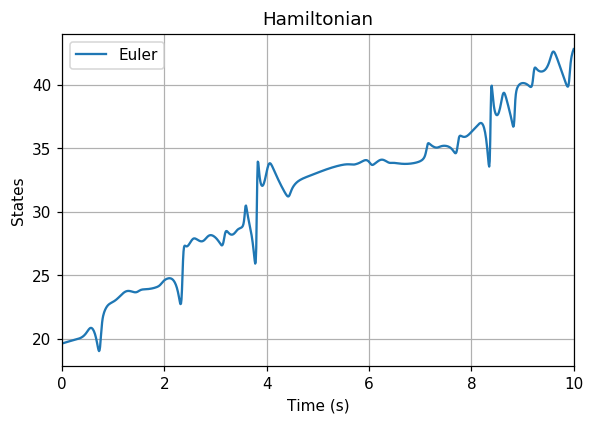

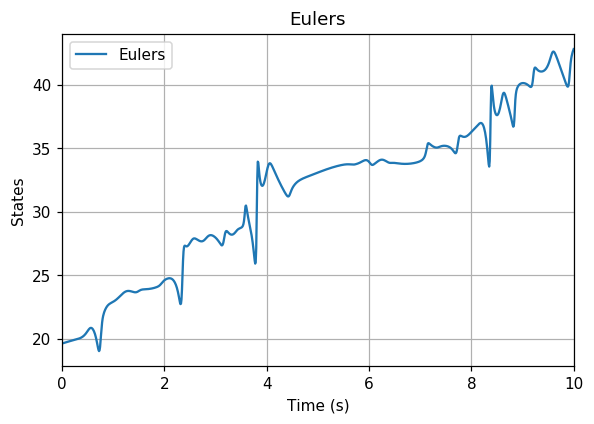

In [ ]:
# Define p and Hamilton's Equations
dLdqdot = sym.Matrix([L]).jacobian(qdot).T
p = dLdqdot
H = p.dot(qdot)-L
Ha = H.subs({m:1,R:1,g:9.81})

# Lambdify
Ha_dummy = Ha.subs({qdot[0]:qdot_dummy[0], qdot[1]:qdot_dummy[1], qdot[2]:qdot_dummy[2]})
lam_ham_fun = sym.lambdify([th1,theta1dot,th2,theta2dot,th3,theta3dot],Ha_dummy)

H1 = xvec[0]
H2 = xvec[1]
H3 = xvec[2]
H4 = xvec[3]
H5 = xvec[4]
H6 = xvec[5]

HAM = lam_ham_fun(H1,H2,H3,H4,H5,H6)
plt.figure(dpi=110,facecolor='w')
plt.plot(tvec,HAM)

plt.xlim(tspan)
plt.title('Hamiltonian')
plt.xlabel('Time (s)')
plt.ylabel('States')

plt.legend(['Euler'])
plt.grid(True)
plt.show()
def euler(f,x,dt):
  xnew = x + dt*f(x)
  
  return xnew

# Here we define the constants/variables relevant to the problem
m,R,g,lbd= sym.symbols('m R g \lambda')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
th3 = sym.Function(r'\theta_3')(t)
phi = sym.Function(r'\phi')(q)

# Here we define our configuration variables
q = sym.Matrix([th1,th2,th3])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Coordinate change to make Lagrangian calculation easier
x1 = +R*sym.sin(th1)
y1 = -R*sym.cos(th1)
x2 = x1 + R*sym.sin(th1+th2)
y2 = y1 - R*sym.cos(th1+th2)
x3 = x2 + R*sym.sin(th1+th2+th3)
y3 = y2 - R*sym.cos(th1+th2+th3)
x1d = x1.diff(t)
y1d = y1.diff(t)
x2d = x2.diff(t)
y2d = y2.diff(t)
x3d = x3.diff(t)
y3d = y3.diff(t)

# Lagrangian
KE = 0.5*m*(x1d**2+y1d**2) + 0.5*m*(x2d**2+y2d**2) + 0.5*m*(x3d**2+y3d**2)
PE = m*g*y1 + m*g*y2 + m*g*y3
L = KE - PE

# Define constraint R = sqrt(5)
phi=x3*x3+y3*y3-5
dphidq = sym.Matrix([phi]).jacobian(q).T

# Euler Lagrange Equations
dLdq = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt = sym.Matrix([L]).jacobian(qdot).T.diff(t)
EulerLagrangeEQs = sym.Eq(ddLdqdot_dt-dLdq, lbd*dphidq)

# For z
dphidt = phi.diff(t)
dphiddt = dphidt.diff(t)
Equation3 = sym.Eq(dphiddt,0)

# Define p and Hamilton's Equations
dLdqdot = sym.Matrix([L]).jacobian(qdot).T
p = dLdqdot
H = p.dot(qdot)-L
Ha = H.subs({m:1,R:1,g:9.81})

# Lambdifying Symbolic Expressions
Ha_dummy = Ha.subs({qdot[0]:qdot_dummy[0], qdot[1]:qdot_dummy[1], qdot[2]:qdot_dummy[2]})
lam_ham_fun = sym.lambdify([th1,theta1dot,th2,theta2dot,th3,theta3dot],Ha_dummy)

H1 = xvec[0]
H2 = xvec[1]
H3 = xvec[2]
H4 = xvec[3]
H5 = xvec[4]
H6 = xvec[5]

HAM = lam_ham_fun(H1,H2,H3,H4,H5,H6)

###################################
# Here we define initial conditions 
# and time variables
tspan = [0,10]
dt = 0.01
x0 = np.array([-np.pi/2, 0, -np.pi/2, 0, np.pi/2, 0])
N = int((max(tspan)-min(tspan))/dt)
tvec = np.linspace(min(tspan),max(tspan),N)

##################
# Here we simulate
xvec = simulate(dynamics,x0,tspan,dt,euler_int=True) # just one line!

plt.figure(dpi=110,facecolor='w')
plt.plot(tvec,HAM)

plt.xlim(tspan)
plt.title('Eulers')
plt.xlabel('Time (s)')
plt.ylabel('States')

plt.legend(['Eulers'])
plt.grid(True)
plt.show()

### Problem #4 (40pts)
Consider a point mass in 3D under the forces of gravity and a radial spring from the origin.  The system's Lagrangian is  
$$L=\frac{1}{2} m (\dot{x}^2+\dot{y}^2+\dot{z}^2)- \frac{1}{2} k (x^2+y^2+z^2)-mgz$$
Consider the following rotation matrices, defining rotations about the $z$, $y$, and $x$ axes respectively
$$
R_\theta =\begin{bmatrix}\cos \theta & -\sin \theta & 0 \\ \sin \theta &
    \cos \theta& 0 \\ 0 & 0 & 1\end{bmatrix}, 
    \ \
R_\psi = \begin{bmatrix}\cos \psi & 0 & \sin \psi \\ 0 & 1 & 0 \\ 
    -\sin \psi & 0 & \cos \psi \end{bmatrix}, \ \
R_\phi = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos \phi & -\sin \phi \\ 
    0 & \sin \phi & \cos \phi \end{bmatrix} 
$$

(a) Which, if any, of the transformations $q_\theta = R_\theta q$, $q_\psi =
R_\psi q$, or $q_\phi = R_\phi q$ keeps the Lagrangian fixed?  Is this
invariance global or local?

(b) Use small angle approximations to linearize your transformation(s)
from part (a).  The resulting new transformation should have the form
$q_\epsilon = q + \epsilon G(q)$.  Compute the difference in the Lagrangian
through this transformation, $L(q_\epsilon, \dot{q}_\epsilon) - L(q,\dot{q})$.

(c) Apply Noether's theorem to determine a conserved quantity.
Physically what does this quantity represent?  Is there any physical
rationale behind it's conservation?

SyntaxError: ignored

(a)
The transformation $q_\theta = R_\theta q$ keeps the Lagrangian fixed.
The rotation matrices shows that:
$$
x_\theta = xcos\theta - ysin\theta
$$
$$
y_\theta = xsin\theta + ycos\theta
$$
$$
z_\theta = z
$$
If we substitute the above equation into system's Lagrangian, it can be found that the Lagrangian keeps the same.

However, other two matrices could not keeps the Lagrangian fixed. The last term of the L (mgz) will be changed.
R_\theta keeps the L globally fixed. $R_\psi$ and $R_\phi$ keeps the L locally fiexd.

(b)
Using small angle approximations:
$$ 
cos\theta = 1, sin\theta = \theta
$$
$$
cos\psi = 1 , sin\psi = \psi
$$
$$
cos\phi = 1 , sin\phi = \phi
$$
Therefore:
$$
R_\theta =\begin{bmatrix}1 & -\theta & 0 \\ \theta &
    1& 0 \\ 0 & 0 & 1\end{bmatrix}, 
    \ \
R_\psi = \begin{bmatrix}1 & 0 & \psi \\ 0 & 1 & 0 \\ 
    -\psi & 0 & 1 \end{bmatrix}, \ \
R_\phi = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & -\phi \\ 
    0 & \phi & 1 \end{bmatrix}
$$
The new transformation are obtatined as:
$$
q_\theta = \begin{bmatrix} x_\theta \\ y_\theta \\ z_\theta \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}+\theta\begin{bmatrix} -y \\ x \\ 0 \end{bmatrix}
$$
$$
q_\psi = \begin{bmatrix} x_\psi \\ y_\psi\\ z_\psi \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}+\psi\begin{bmatrix} z \\ 0 \\ -x \end{bmatrix}
$$
$$
q_\phi = \begin{bmatrix} x_\phi \\ y_\phi \\ z_\phi \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}+\phi\begin{bmatrix} 0 \\ -z \\ y \end{bmatrix}
$$
The difference in Lagrangian through transformation:
$$
L_\theta = \frac{1}{2}m(\dot{x_\theta}^2+\dot{y_\theta}^2+\dot{z_\theta}^2)-\frac{1}{2}k(x_\theta^2+y_\theta^2+z_\theta^2)-mgz_\theta = L + \frac{1}{2}m\theta^2(\dot{x}^2+\dot{y}^2)-\frac{1}{2}k\theta^2(x^2+y^2)
$$
$$
L_\theta - L =\frac{1}{2}m\theta^2(\dot{x}^2+\dot{y}^2)-\frac{1}{2}k\theta^2(x^2+y^2)
$$
Similarly
$$
L_\psi - L =\frac{1}{2}m\psi^2(\dot{x}^2+\dot{z}^2)-\frac{1}{2}k\psi^2(x^2+z^2)+mgx\psi
$$
$$
L_\phi - L =\frac{1}{2}m\phi^2(\dot{y}^2+\dot{z}^2)-\frac{1}{2}k\phi^2(y^2+z^2)-mgy\phi
$$

(c)


When $\theta=0$ , $\frac{\partial L_\theta}{\partial \theta}= 0 $.

Therefore, $\frac{d}{dt}\frac{\partial L_\theta}{\partial \dot{\theta}} = 0 $.

Which implies $\frac{\partial L_\theta}{\partial \dot{\theta}}$ is constant.

$\theta$ is a conserved quantity.

However for other two rotations, $\frac{\partial L_k}{\partial q_k} $ is not equal to zero. Therefore, $\psi$ and $\phi$ are not conserved qunatities.

The converved quantity physically represents the angular momentum about the z axis. The rationale is that there is no torque on the spring.